In [1]:
from experiments import ai_comparison_experiments
from multiprocessing import Pool

from chainreaction.game import *
from chainreaction.positions import *
from chainreaction.board import *
from chainreaction.four_players import *
from chainreaction.mcts import *
from chainreaction.minimax import *

from experiments.utils import *
from functools import partial

from experiments import team_experiments

import matplotlib.pyplot as plt

In [2]:
pool = Pool(16)

In [3]:
win_together_rates = []
ind_win_rates = []

for i in range(1, 6):
    ai_step = partial(minimax_step, max_depth=i)
    config = {
    'team_players': [FourPlayers.P1, FourPlayers.P2],
    'team_players_ai': [ai_step, ai_step],
    'ind_players': [FourPlayers.P3, FourPlayers.P4],
    'ind_players_ai': [ai_step, ai_step]
    }   

    win_together, _, ind_win = team_experiments.run_experiments(pool, config, 50)
    win_together_rates.append(win_together)
    ind_win_rates.append(ind_win)

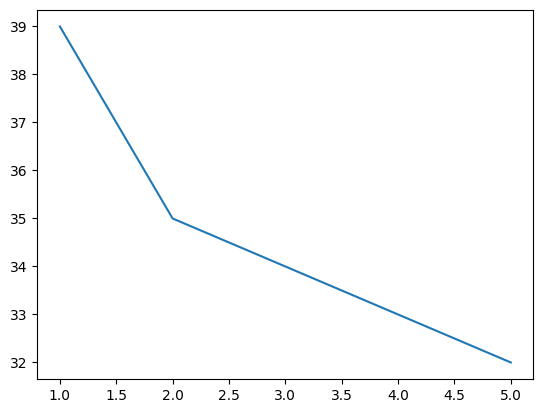

In [17]:
plt.plot(range(1, 6), win_together_rates)
plt.show()

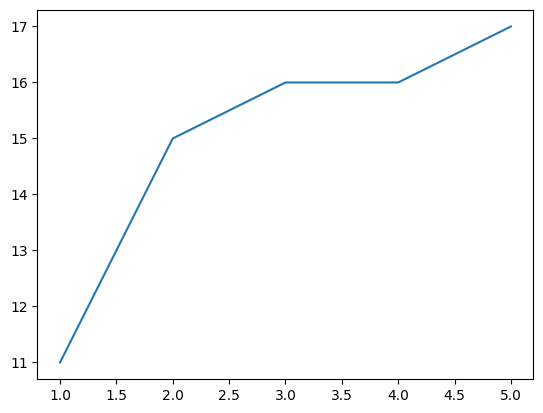

In [18]:
plt.plot(range(1, 6), ind_win_rates)
plt.show()

In [4]:
win_together_rates = []
ind_win_rates = []

for i in range(1, 6):
    ai_step = partial(mcts_step, num_simulations=i * 1000)
    config = {
    'team_players': [FourPlayers.P1, FourPlayers.P2],
    'team_players_ai': [mcts_step, mcts_step],
    'ind_players': [FourPlayers.P3, FourPlayers.P4],
    'ind_players_ai': [mcts_step, mcts_step]
    }   

    win_together, loose, ind_win = team_experiments.run_experiments(pool, config, 50)
    print(win_together, loose, ind_win)
    win_together_rates.append(win_together)
    ind_win_rates.append(ind_win)

0 50 0
0 50 0
0 50 0


In [3]:
config = {
    'team_players': [FourPlayers.P1, FourPlayers.P2],
    'team_players_ai': [mcts_step, mcts_step],
    'ind_players': [FourPlayers.P3, FourPlayers.P4],
    'ind_players_ai': [mcts_step, mcts_step]
}   

team_experiments.run_experiments(pool, config, 50)

(0, 50, 0)

In [24]:
win_together_rates

[0, 0, 0, 0, 0]

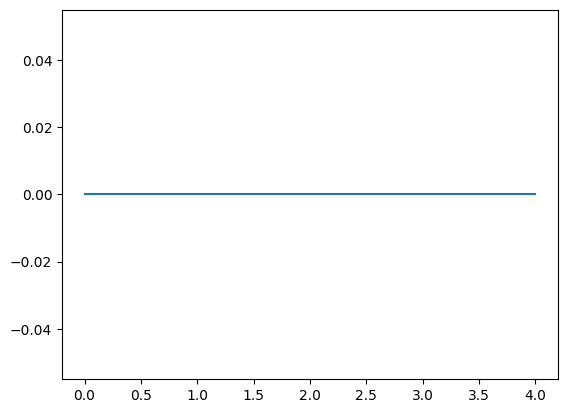

In [23]:
plt.plot(win_together_rates)
plt.show()

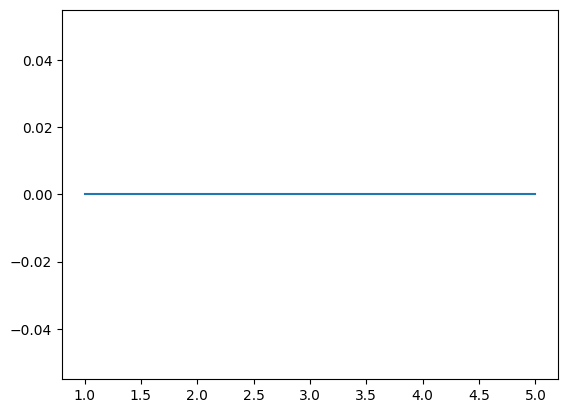

In [22]:
plt.plot(range(1, 6), ind_win_rates)
plt.show()